###This is the sample of Logistic Model using is indian Diabetes


In [130]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import sklearn as skl
import pickle as pk
import seaborn as sb
from sklearn.metrics import classification_report
import sklearn.preprocessing import MinMaxScaler

In [131]:
df=pd.read_csv("pima_indian_diabetes.csv")
scaler=MinMaxScaler()


In [132]:

df

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,1,89,66,23,94,28.1,21,0
1,0,137,40,35,168,43.1,33,1
2,3,78,50,32,88,31.0,26,1
3,2,197,70,45,543,30.5,53,1
4,1,189,60,23,846,30.1,59,1
5,5,166,72,19,175,25.8,51,1
6,0,118,84,47,230,45.8,31,1
7,1,103,30,38,83,43.3,33,0
8,1,115,70,30,96,34.6,32,1
9,3,126,88,41,235,39.3,27,0


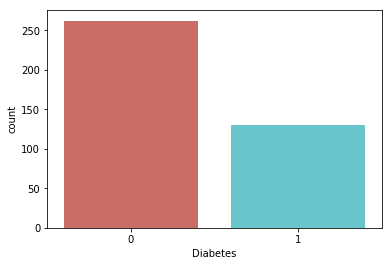

In [133]:
sb.countplot(x='Diabetes',data=df, palette='hls')

In [166]:
df.groupby('Diabetes').max()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age
Diabetes,,,,,,,
0,13,197,106,60,744,57.3,81
1,17,198,110,63,846,67.1,60


In [167]:
df.groupby('Diabetes').min()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age
Diabetes,,,,,,,
0,0,56,24,7,15,18.2,21
1,0,78,30,7,14,22.9,21


In [169]:
df.groupby('Diabetes').median()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age
Diabetes,,,,,,,
0,2.0,107.5,70.0,27.0,105.0,31.25,25.0
1,3.0,144.5,74.0,33.0,169.5,34.60,33.0


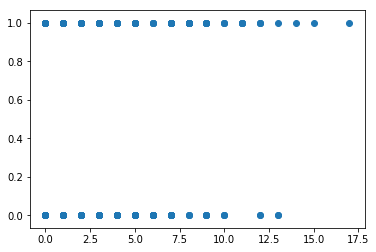

In [170]:
plt.scatter(df['No_Times_Pregnant'],df['Diabetes'])

In [134]:
df.isnull().sum()

No_Times_Pregnant    0
Plasma_Glucose       0
Diastolic_BP         0
Triceps              0
Insulin              0
BMI                  0
Age                  0
Diabetes             0
dtype: int64

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
No_Times_Pregnant    392 non-null int64
Plasma_Glucose       392 non-null int64
Diastolic_BP         392 non-null int64
Triceps              392 non-null int64
Insulin              392 non-null int64
BMI                  392 non-null float64
Age                  392 non-null int64
Diabetes             392 non-null int64
dtypes: float64(1), int64(7)
memory usage: 24.6 KB


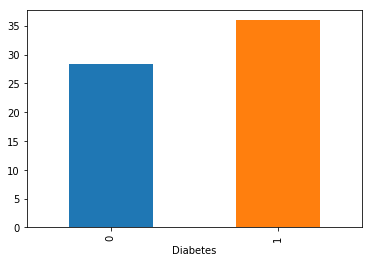

In [136]:
we=df.groupby(['Diabetes'])['Age'].mean()
we.plot.bar()

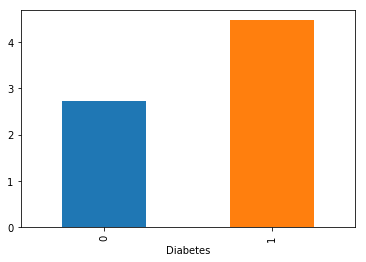

In [137]:
se=df.groupby(['Diabetes'])['No_Times_Pregnant'].mean()
se.plot.bar()

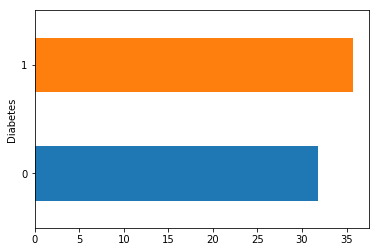

In [138]:
we=df.groupby(['Diabetes'])['BMI'].mean()
we.plot.barh()

In [139]:
total=np.random.permutation(len(df))
total

array([ 75, 172, 232, 231, 217, 322, 302, 275, 386, 285,  81, 114, 175,
       261, 194, 308,  43, 180, 300, 299, 135, 220,  78, 288,  24,  34,
       362, 389,  31, 137, 335, 340, 115, 120,  42, 105, 103, 166, 357,
        59,  57, 268, 256,  67, 164, 350, 237, 156, 272, 171, 382, 327,
        20, 252, 158, 330, 181,  58,  92, 133, 255, 352,  30,  97, 203,
       311, 138, 291,  91,  11, 168,  51, 163, 280, 106, 225, 361, 380,
       282,  73, 177,  13, 351, 372, 112, 370, 179,  96, 265, 233, 366,
       185, 116, 246, 223, 339,  88, 234, 277,  45, 253, 365, 132, 319,
       314, 301, 315,  80,  28, 293, 123, 254, 251,  85, 313, 245, 145,
       235, 242, 195, 100, 346, 294, 355,  32, 309,  60, 209, 191, 241,
       283, 260, 263, 204, 359,  25, 312, 348, 367, 210, 329, 316,  56,
       189, 154, 186, 388, 297, 264, 269,  21, 266, 139, 369, 341, 165,
         5,  93, 379, 390,  12,  54,  52,  16, 305, 170,   9,  87,   8,
        35, 387,  33,  47, 107, 342,  82, 228, 378,  49, 208, 37

In [140]:
test_set_size = int(len(df) * 0.3)
train_set_size=int(len(df)*0.7)
test_indices = total[:test_set_size]
train_indices = total[train_set_size:]
test=df.iloc[test_indices]
test

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
75,1,109,56,21,135,25.2,23,0
172,8,126,88,36,108,38.5,49,0
232,2,100,54,28,105,37.8,24,0
231,0,91,68,32,210,39.9,25,0
217,4,184,78,39,277,37.0,31,1
322,0,102,78,40,90,34.5,24,0
302,3,176,86,27,156,33.3,52,1
275,3,129,92,49,155,36.4,32,1
386,1,121,78,39,74,39.0,28,0
285,1,88,62,24,44,29.9,23,0


In [141]:
train=df.iloc[train_indices]
train

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
66,0,93,60,25,92,28.7,22,0
36,2,100,68,25,71,38.5,26,0
303,2,112,78,50,140,39.4,24,0
167,1,95,60,18,58,23.9,22,0
23,8,176,90,34,300,33.7,58,1
207,1,112,72,30,176,34.4,25,0
125,3,191,68,15,130,30.9,34,0
227,0,95,80,45,92,36.5,26,0
292,1,99,72,30,18,38.6,21,0
371,1,149,68,29,127,29.3,42,1


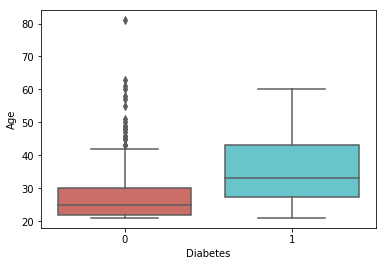

In [142]:
sb.boxplot(x='Diabetes', y='Age', data=df, palette='hls')

In [143]:
 no= pd.get_dummies(df['No_Times_Pregnant'],drop_first=True)
no.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [144]:
df.head()

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes
0,1,89,66,23,94,28.1,21,0
1,0,137,40,35,168,43.1,33,1
2,3,78,50,32,88,31.0,26,1
3,2,197,70,45,543,30.5,53,1
4,1,189,60,23,846,30.1,59,1


In [145]:
df_dmy=pd.concat([df,no],axis=1)
df_dmy.head(10)

,No_Times_Pregnant,Plasma_Glucose,Diastolic_BP,Triceps,Insulin,BMI,Age,Diabetes,1,2,...,7,8,9,10,11,12,13,14,15,17
0,1,89,66,23,94,28.1,21,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,137,40,35,168,43.1,33,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,78,50,32,88,31.0,26,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,197,70,45,543,30.5,53,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,189,60,23,846,30.1,59,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,5,166,72,19,175,25.8,51,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,118,84,47,230,45.8,31,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,103,30,38,83,43.3,33,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,115,70,30,96,34.6,32,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,3,126,88,41,235,39.3,27,0,0,0,...,0,0,0,0,0,0,0,0,0,0


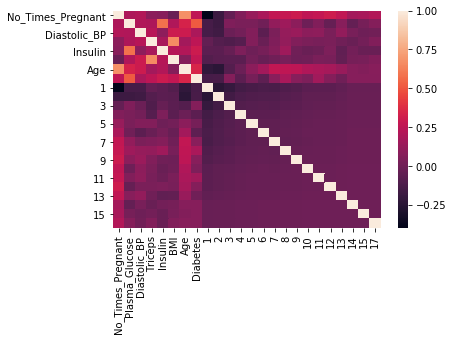

In [146]:
sb.heatmap(df_dmy.corr()) 

In [147]:
df_dmy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 24 columns):
No_Times_Pregnant    392 non-null int64
Plasma_Glucose       392 non-null int64
Diastolic_BP         392 non-null int64
Triceps              392 non-null int64
Insulin              392 non-null int64
BMI                  392 non-null float64
Age                  392 non-null int64
Diabetes             392 non-null int64
1                    392 non-null uint8
2                    392 non-null uint8
3                    392 non-null uint8
4                    392 non-null uint8
5                    392 non-null uint8
6                    392 non-null uint8
7                    392 non-null uint8
8                    392 non-null uint8
9                    392 non-null uint8
10                   392 non-null uint8
11                   392 non-null uint8
12                   392 non-null uint8
13                   392 non-null uint8
14                   392 non-null uint8
15           

In [148]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [149]:
log_reg.fit(train.drop('Diabetes',axis=1),train['Diabetes'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [150]:
predict=log_reg.predict(test.drop('Diabetes',axis=1))
predict

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0], dtype=int64)

In [151]:
from sklearn.metrics import confusion_matrix,re
are=confusion_matrix(predict,test['Diabetes'])
are

array([[62, 12],
       [22, 21]], dtype=int64)

In [160]:
TP = are[0][0]
FP = are[0][1]
FN = are[1][0]
TN = are[1][1]


In [164]:
 FPR=FP/(FP+TN)
print(FPR)

0


In [152]:
print(classification_report(test['Diabetes'],predict))

             precision    recall  f1-score   support

          0       0.84      0.74      0.78        84
          1       0.49      0.64      0.55        33

avg / total       0.74      0.71      0.72       117



In [153]:
from sklearn.metrics import accuracy_score
accuracy_score(predict,test['Diabetes'])

0.7094017094017094

In [154]:
from sklearn.metrics import precision_score
precision_score(predict,test['Diabetes'])

0.6363636363636364

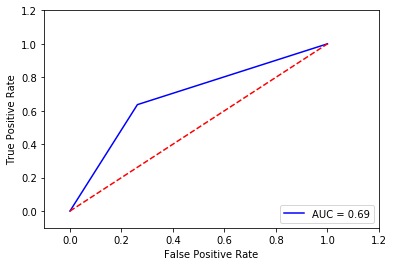

In [165]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(test['Diabetes'],predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc) 
plt.legend(loc='lower right') 
plt.plot([0,1],[0,1],'r--') 
plt.xlim([-0.1,1.2]) 
plt.ylim([-0.1,1.2]) 
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate')
plt.show()
